# 6.5 Unsupervised Machine Learning: Clustering

### Contents

1. Import libraries and data set
2. The elbow technique
3. K-means clustering
4. Results|

## 1. Import libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#Initiate matplotlib visuals
%matplotlib inline

In [3]:
#Create path variable
path = r'C:\Users\lisa_\Desktop\CareerFoundry\Exercises\Advanced Analytics & Dashboard Design'

In [4]:
#Import the King County data
df = pd.read_csv(os.path.join(path, 'kc_house_data_clean.csv'), index_col=False)

In [5]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21603, 20)

## 2. The elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2965358482567644.5,
 -1407855373672389.5,
 -783439290331538.0,
 -514120327023507.2,
 -377489167108516.06,
 -290874203857079.8,
 -232476480007534.12,
 -189082610440720.1,
 -163606674849211.0]

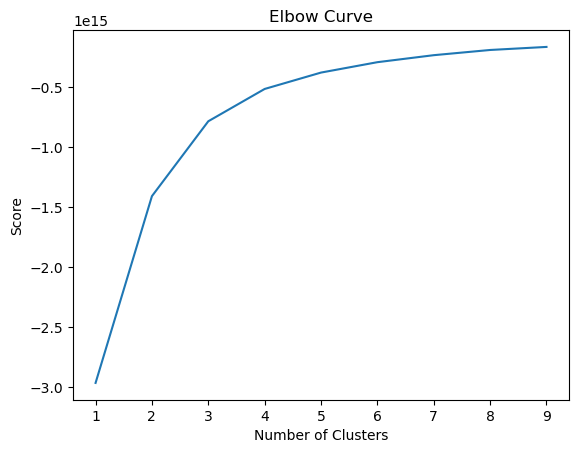

In [9]:
#Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There is a large jump from two to three and a small jump from three to four on the x-axis then it straightens out meaning that the count of clusters is four but we will be using 3 clusters for the purpose of this exercise.

## 3. K-means clustering

In [10]:
#Create the k-means object.
kmeans = KMeans(n_clusters=3)

In [11]:
#Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [12]:
#Create clusters column
df['clusters'] = kmeans.fit_predict(df)
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2,180000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [13]:
#Drop Unnamed columns
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [14]:
#Check value counts
df['clusters'].value_counts()

1    15072
0     5925
2      606
Name: clusters, dtype: int64

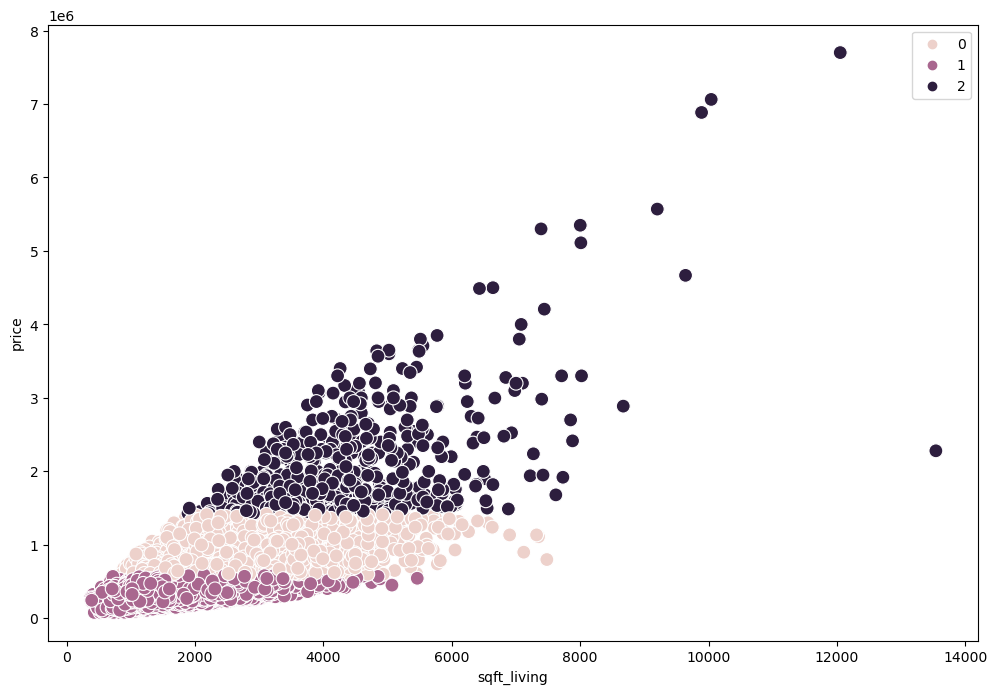

In [15]:
#Plot the clusters for the 'price' and 'sqft_living' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

#### The purple cluster (1) is the most populated cluster. It gathers the data points with smallest square fotage and lowest price. The light pink cluster (0) includes points with higher price and more points with larger square footage than the purple cluster. The dark purple cluster (2) contains points with the highest price and largest square footage. The clusters show a visible connection between square footage and price.

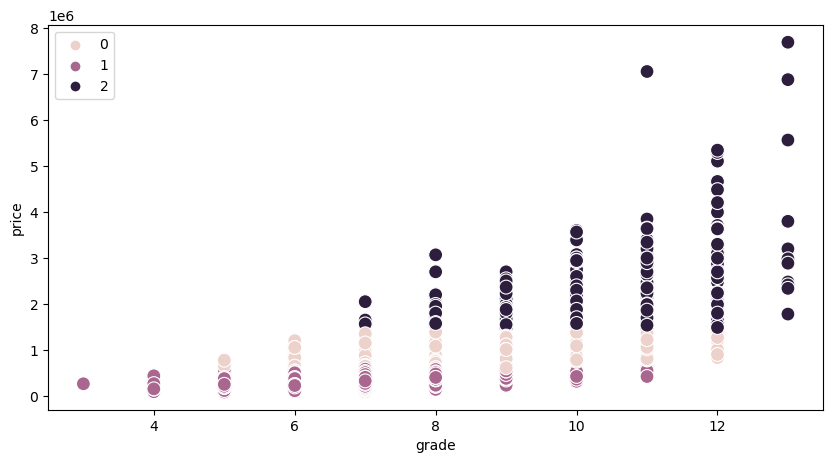

In [16]:
# Plot the clusters for the 'grade' and 'price' variables.

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df['grade'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('grade') 
plt.ylabel('price') 
plt.show()

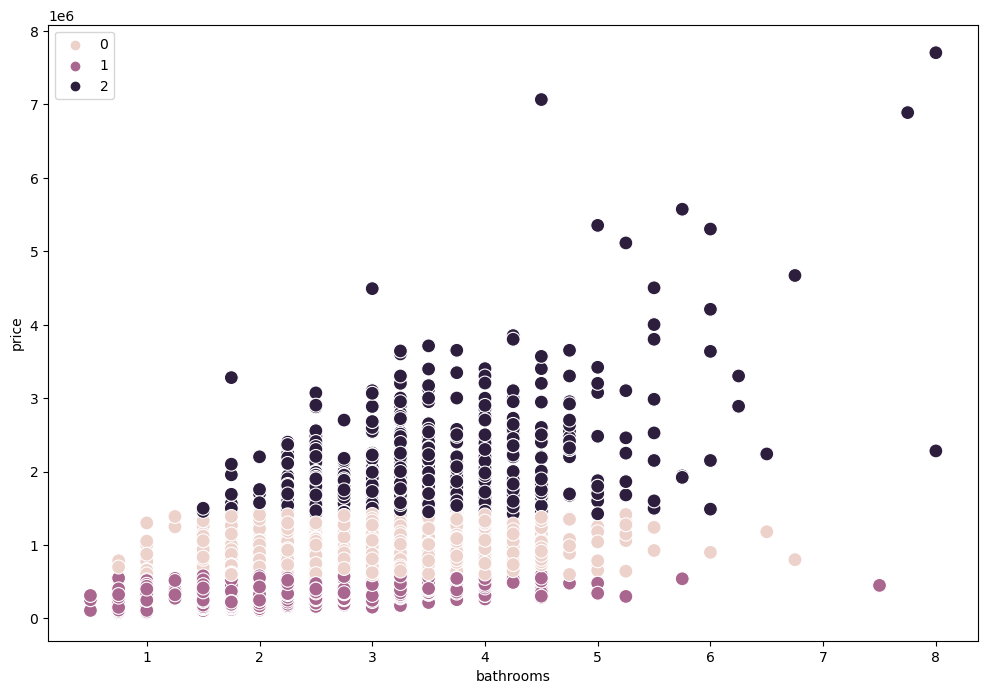

In [17]:
# Plot the clusters for the 'bathrooms' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('bathrooms') 
plt.ylabel('price') 
plt.show()

#### The light pink and dark purple clusters are the most populated clusters

In [18]:
#Use groupby() function to separate data points in each cluster
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [19]:
#Calculate descriptive statistics
df.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'grade':['mean', 'median'], 
                         'bathrooms':['mean', 'median'],
                          'price':['mean', 'median']})

sqft_living              grade        bathrooms         \
                   mean  median       mean median      mean median   
cluster                                                              
light pink  2721.300928  2650.0   8.522700    8.0  2.518101    2.5   
pink        1737.519838  1660.0   7.212911    7.0  1.902982    2.0   
purple      4331.514851  4150.0  10.255776   10.0  3.473185    3.5   

                   price             
                    mean     median  
cluster                              
light pink  8.084865e+05   751305.0  
pink        3.747870e+05   370000.0  
purple      2.028666e+06  1795000.0

### Results

1. The purple cluster has the best stats in almost all categories. The median values are higher than the other three. It has the biggest square footage, highest grade and most number of bathrooms which equates to the highest price.

2. On the other hand, the light pink cluster with the smallest values have the least price.

3. The results show that the larger the square footage, the higher the grade (construction quality) and the more bathrooms equate to higher price.

4. This maybe will help predict what the trend in price will be in the future.

In [21]:
#Export data

df.to_csv(os.path.join(path, 'kc_house_data_clean.csv'))